In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, SCORERS, log_loss

In [2]:
#load data
RANDOM_SEED = 42
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087701 entries, 0 to 1087701
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1087701 non-null  int64  
 1   activity   1087701 non-null  object 
 2   timestamp  1087701 non-null  int64  
 3   x-axis     1087701 non-null  float64
 4   y-axis     1087701 non-null  float64
 5   z-axis     1087701 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.1+ MB


In [3]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,15,Standing,1268382274000,10.08,9.81,4.481094
1,15,Standing,1268382274000,10.08,9.81,4.481094
2,15,Standing,1268382274000,10.08,9.81,4.481094
3,15,Standing,1268382274000,10.08,9.81,4.481094
4,15,Standing,1268382274000,10.08,9.81,4.481094
...,...,...,...,...,...,...
1087697,19,Sitting,131623331483000,9.00,-1.57,1.690000
1087698,19,Sitting,131623371431000,9.04,-1.46,1.730000
1087699,19,Sitting,131623411592000,9.08,-1.38,1.690000
1087700,19,Sitting,131623491487000,9.00,-1.46,1.730000


In [4]:
'''Walking: 1
Jogging: 2
Upstairs: 3
Downstairs: 4 
Sitting: 5
Standing: 6'''
df.replace('Walking', 1, inplace=True)
df.replace('Jogging', 2, inplace=True)
df.replace('Upstairs', 3, inplace=True)
df.replace('Downstairs', 4, inplace=True)
df.replace('Sitting', 5, inplace=True)
df.replace('Standing', 6, inplace=True)

In [7]:
# 인덱스 없애기
df.to_csv('wisdom.txt', sep = '\t', index = False)

In [5]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,15,6,1268382274000,10.08,9.81,4.481094
1,15,6,1268382274000,10.08,9.81,4.481094
2,15,6,1268382274000,10.08,9.81,4.481094
3,15,6,1268382274000,10.08,9.81,4.481094
4,15,6,1268382274000,10.08,9.81,4.481094
...,...,...,...,...,...,...
1087697,19,5,131623331483000,9.00,-1.57,1.690000
1087698,19,5,131623371431000,9.04,-1.46,1.730000
1087699,19,5,131623411592000,9.08,-1.38,1.690000
1087700,19,5,131623491487000,9.00,-1.46,1.730000


In [6]:
def pro(df,i):
    is1 = df[df['user'] == i]
    label=is1['activity']
    is1.drop(['activity'],axis=1,inplace=True)
    is1.drop(['timestamp'],axis=1,inplace=True)
    is1.drop(['user'],axis=1,inplace=True)
    return is1,label

In [7]:
df1,label1=pro(df,1)
df2,label2=pro(df,2)
df3,label3=pro(df,3)
df4,label4=pro(df,4)
df5,label5=pro(df,5)
df6,label6=pro(df,6)
df7,label7=pro(df,7)
df8,label8=pro(df,8)
df9,label9=pro(df,9)
df10,label10=pro(df,10)
df11,label11=pro(df,11)
df12,label12=pro(df,12)
df13,label13=pro(df,13)
df14,label14=pro(df,14)
df15,label15=pro(df,15)
df16,label16=pro(df,16)
df17,label17=pro(df,17)
df18,label18=pro(df,18)
df19,label19=pro(df,19)
df20,label20=pro(df,20)
df21,label21=pro(df,21)
df22,label22=pro(df,22)
df23,label23=pro(df,23)
df24,label24=pro(df,24)
df25,label25=pro(df,25)
df26,label26=pro(df,26)
df27,label27=pro(df,27)
df28,label28=pro(df,28)
df29,label29=pro(df,29)
df30,label30=pro(df,30)

C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['activity'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['timestamp'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['us

C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['activity'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['timestamp'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['us

C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['activity'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['timestamp'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['us

C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['activity'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['timestamp'],axis=1,inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_32296\3339701319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is1.drop(['us

In [8]:
ddd = set(label16)
ddd

{1, 2, 3, 4, 5, 6}

In [9]:
testx = np.concatenate((df22,df23,df24,df25,df26,df27,df28,df29,df30),axis=0)
testy = np.concatenate((label22,label23,label24,label25,label26,label27,label28,label29,label30),axis=0)

In [10]:
df1

,x-axis,y-axis,z-axis
332676,10.08,9.81,4.481094
332677,10.08,9.81,4.481094
332678,10.08,9.81,4.481094
332679,10.08,9.81,4.481094
332680,10.08,9.81,4.481094
...,...,...,...
961431,-0.61,9.72,2.070000
961432,5.71,11.35,0.690000
961433,8.62,5.41,-1.180000
961434,4.25,7.59,0.080000


In [11]:
def make_data(df):
    scaler = MinMaxScaler()
    df=pd.DataFrame(scaler.fit_transform(df[:]))
    return df
df1 = make_data(df1)
df2 = make_data(df2)
df3 = make_data(df3)
df4 = make_data(df4)
df5 = make_data(df5)
df6 = make_data(df6)
df7 = make_data(df7)
df8 = make_data(df8)
df9 = make_data(df9)
df10 = make_data(df10)
df11 = make_data(df11)
df12 = make_data(df12)
df13 = make_data(df13)
df14 = make_data(df14)
df15 = make_data(df15)
df16 = make_data(df16)
df17 = make_data(df17)
df18 = make_data(df18)
df19 = make_data(df19)
df20 = make_data(df20)
df21 = make_data(df21)
test = make_data(testx)

In [12]:
df1

,0,1,2
0,0.757785,0.750893,0.598925
1,0.757785,0.750893,0.598925
2,0.757785,0.750893,0.598925
3,0.757785,0.750893,0.598925
4,0.757785,0.750893,0.598925
...,...,...,...
30093,0.484941,0.748596,0.532320
30094,0.646248,0.790199,0.494199
30095,0.720521,0.638591,0.442541
30096,0.608984,0.694232,0.477348


In [13]:
def polar(df) : 
    dataf = pd.DataFrame(index=range(0,len(df)), columns=range(0,3))
    for j in range(len(df)) :
        xy = df[0][j]**2 +df[1][j]**2
        dataf[0][j] = np.sqrt(xy+df[2][j]**2)
        dataf[1][j] = np.arctan2(np.sqrt(xy), df[2][j])
        dataf[2][j] = np.arctan2(df[1][j],df[0][j])

    return dataf

In [14]:
polar1 = polar(df1)
polar2 = polar(df2)
polar3 = polar(df3)
polar4 = polar(df4)
polar5 = polar(df5)
polar6 = polar(df6)
polar7 = polar(df7)
polar8 = polar(df8)
polar9 = polar(df9)
polar10 = polar(df10)
polar11 = polar(df11)
polar12 = polar(df12)
polar13 = polar(df13)
polar14 = polar(df14)
polar15 = polar(df15)
polar16 = polar(df16)
polar17 = polar(df17)
polar18 = polar(df18)
polar19 = polar(df19)
polar20 = polar(df20)
polar21 = polar(df21)
polartest = polar(test)

In [15]:
polar1

,0,1,2
0,1.223434,1.059229,0.78083
1,1.223434,1.059229,0.78083
2,1.223434,1.059229,0.78083
3,1.223434,1.059229,0.78083
4,1.223434,1.059229,0.78083
...,...,...,...
30093,1.038715,1.032726,0.995969
30094,1.134144,1.119929,0.885278
30095,1.059619,1.139948,0.725189
30096,1.039558,1.09372,0.850718


In [16]:
mergegasf = pd.DataFrame(columns=range(0,3))

In [17]:
def make_images(polar) :
    mergegasf = pd.DataFrame(columns=range(0,3), index =range(0,len(polar)//20))
    p=0
    for j in range(0,len(polar),20):
        X = np.array(polar[j:j+19][0]).reshape(1,-1)
        Y = np.array(polar[j:j+19][1]).reshape(1,-1)
        Z = np.array(polar[j:j+19][2]).reshape(1,-1)
        Xgasf = GramianAngularField(method='summation')
        Xgasf = Xgasf.fit_transform(X)
        Ygasf = GramianAngularField(method='summation')
        Ygasf = Ygasf.fit_transform(Y)
        Zgasf = GramianAngularField(method='summation')
        Zgasf = Zgasf.fit_transform(Z)
        mergegasf[0][p] = Xgasf
        mergegasf[1][p] = Ygasf
        mergegasf[2][p] = Zgasf
        p=p+1
    
    return mergegasf

In [18]:
mergegasf1 = make_images(polar1)

In [19]:
len(mergegasf1[0])
#1498x1x19x19

1504

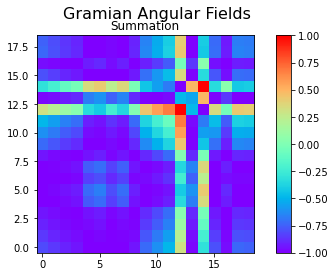

In [20]:
def show_image(images):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 1),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     ) 
    titles = ['Summation']
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()

images = [mergegasf1[0][100][0]]
show_image(images)

In [21]:
mergegasf2 = make_images(polar2)
mergegasf3 = make_images(polar3)
mergegasf4 = make_images(polar4)
mergegasf5 = make_images(polar5)
mergegasf6 = make_images(polar6)
mergegasf7 = make_images(polar7)
mergegasf8 = make_images(polar8)
mergegasf9 = make_images(polar9)
mergegasf10 = make_images(polar10)
mergegasf11 = make_images(polar11)
mergegasf12 = make_images(polar12)
mergegasf13 = make_images(polar13)
mergegasf14 = make_images(polar14)
mergegasf15 = make_images(polar15)
mergegasf16 = make_images(polar16)
mergegasf17 = make_images(polar17)
mergegasf18 = make_images(polar18)
mergegasf19 = make_images(polar19)
mergegasf20 = make_images(polar20)
mergegasf21 = make_images(polar21)
mergegasftest = make_images(polartest)
#35174,1,21,21

In [22]:
len(mergegasf21[0][0][0][0])

19

In [23]:
import os
import tensorflow as tf
from tensorflow import reshape
from collections import OrderedDict
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from sklearn.metrics import accuracy_score

In [24]:
mergegasf1[0][0][0][0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [25]:
def make_label(label,df):
    label2 = []
    for i in range(0,len(df)-18,20) :
        label2.append(label.iloc[i])
    return label2

In [26]:
def make_testlabel(label,df):
    label2 = []
    for i in range(1,len(df)-19,20) :
        label2.append(label[i])
    return label2

In [27]:
label1 = make_label(label1,df1)
label2 = make_label(label2,df2)
label3 = make_label(label3,df3)
label4 = make_label(label4,df4)
label5 = make_label(label5,df5)
label6 = make_label(label6,df6)
label7 = make_label(label7,df7)
label8 = make_label(label8,df8)
label9 = make_label(label9,df9)
label10 = make_label(label10,df10)
label11 = make_label(label11,df11)
label12 = make_label(label12,df12)
label13 = make_label(label13,df13)
label14 = make_label(label14,df14)
label15 = make_label(label15,df15)
label16 = make_label(label16,df16)
label17 = make_label(label17,df17)
label18 = make_label(label18,df18)
label19 = make_label(label19,df19)
label20 = make_label(label20,df20)
label21 = make_label(label21,df21)

In [28]:
labeltest = make_testlabel(testy,testx)

In [29]:
def make_client(mergegasf,label):
    mergegasf= np.transpose(mergegasf.values.tolist(),(0,3,4,1,2))
    mergegasf = mergegasf.reshape(*mergegasf.shape[:-1])
    X, Y = [],[]
    X = mergegasf
    Y = label
    Y = pd.get_dummies(Y)
    dataset = tf.data.Dataset.from_tensor_slices((list(X),Y))
    
    return dataset.shuffle(len(Y)).batch(27)#원래는 64

In [30]:
clients_batched = dict()
clients_batched[1] = make_client(mergegasf1,label1)
clients_batched[2] = make_client(mergegasf2,label2)
clients_batched[3] = make_client(mergegasf3,label3)
clients_batched[4] = make_client(mergegasf4,label4)
clients_batched[5] = make_client(mergegasf5,label5)
clients_batched[6] = make_client(mergegasf6,label6)
clients_batched[7] = make_client(mergegasf7,label7)
clients_batched[8] = make_client(mergegasf8,label8)
clients_batched[9] = make_client(mergegasf9,label9)
clients_batched[10] = make_client(mergegasf10,label10)
clients_batched[11] = make_client(mergegasf11,label11)
clients_batched[12] = make_client(mergegasf12,label12)
clients_batched[13] = make_client(mergegasf13,label13)
clients_batched[14] = make_client(mergegasf14,label14)
clients_batched[15] = make_client(mergegasf15,label15)
clients_batched[16] = make_client(mergegasf16,label16)
clients_batched[17] = make_client(mergegasf17,label17)
clients_batched[18] = make_client(mergegasf18,label18)
clients_batched[19] = make_client(mergegasf19,label19)
clients_batched[20] = make_client(mergegasf20,label20)
clients_batched[21] = make_client(mergegasf21,label21)

In [31]:
clients_batched

{1: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 2: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 3: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 4: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 5: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 6: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 7: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 8: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 9: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 10: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 11: <BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>,
 12: <Ba

In [32]:
def make_test(mergegasf,label):
    mergegasf= np.transpose(mergegasf.values.tolist(),(0,3,4,1,2))
    mergegasf = mergegasf.reshape(*mergegasf.shape[:-1])
    X, Y = [],[]
    X = mergegasf
    Y = tuple(label)
    Y = pd.get_dummies(Y)
    return X,Y

In [33]:
testx,testy = make_test(mergegasftest,labeltest)

In [34]:
len(testx)

11983

In [35]:
len(testy)

11983

In [36]:
testbatched = tf.data.Dataset.from_tensor_slices((testx,testy)).batch(len(testy))
testbatched

<BatchDataset shapes: ((None, 19, 19, 3), (None, 6)), types: (tf.float64, tf.uint8)>

In [37]:
def create_keras_model():

    # Create keras model
    model = Sequential()

    # 1st convolution layer
    model.add(InputLayer(input_shape=(19,19,3)))

    model.add(Conv2D(filters=32,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))

    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=1,padding='same',activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(4,4),strides=2,padding='same'))
    
    # Fully connected layer
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(6, activation='softmax'))

    # Compile the model
    #model.compile(loss=SparseCategoricalCrossentropy(),
    #              optimizer=SGD(learning_rate=0.02),
    #              metrics=[SparseCategoricalAccuracy()])
    
    return model

# Summary model
keras_model = create_keras_model()
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [38]:
from tensorflow.keras.optimizers import Adam
lr = 0.001  #원래 0.01
comms_round = 50
loss='categorical_crossentropy'
metrics = ['CategoricalAccuracy']
optimizer = SGD(learning_rate=lr, decay=lr / comms_round, momentum=0.99)   

#optimizer = Adam(learning_rate=lr, decay=lr / comms_round) 

In [39]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1)) 
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [41]:
#initialize global model
import random
global_model = create_keras_model()
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        local_model = create_keras_model()
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=10, verbose=0) #epoch 1: 18% 10 :20% 100 :
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in testbatched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)

comm_round: 0 | global_acc: 38.530% | global_loss: 1.640352487564087
comm_round: 1 | global_acc: 50.864% | global_loss: 1.5682258605957031
comm_round: 2 | global_acc: 51.164% | global_loss: 1.5377492904663086
comm_round: 3 | global_acc: 51.648% | global_loss: 1.5327686071395874
comm_round: 4 | global_acc: 51.990% | global_loss: 1.5246273279190063
comm_round: 5 | global_acc: 51.281% | global_loss: 1.5281883478164673
comm_round: 6 | global_acc: 53.225% | global_loss: 1.5118781328201294
comm_round: 7 | global_acc: 52.766% | global_loss: 1.5152925252914429
comm_round: 8 | global_acc: 51.590% | global_loss: 1.5214475393295288
comm_round: 9 | global_acc: 53.568% | global_loss: 1.5033260583877563
comm_round: 10 | global_acc: 51.381% | global_loss: 1.522341012954712
comm_round: 11 | global_acc: 53.968% | global_loss: 1.4997966289520264
comm_round: 12 | global_acc: 53.008% | global_loss: 1.5058739185333252
comm_round: 13 | global_acc: 53.384% | global_loss: 1.5034682750701904
comm_round: 14 | g

KeyboardInterrupt: 